In [7]:
import numpy as np
import pandas as pd
from math import exp
from math import log
import matplotlib.pyplot as plt

In [8]:
def scale_data(data):
    for i in data.columns:
        if i != "Outcome":
          data[i] = (data[i] - data[i].mean()) / (data[i].max() - data[i].min())
          # data[i] = (data[i] - data[i].mean()) / data[i].std()
    return data

In [9]:
def plot_data():
    # y = target values, last column of the data frame
    y = data.iloc[:, -1]
    # filter out the applicants that got admitted
    has_diabetes = data.loc[y == 1]

    # filter out the applicants that din't get admission
    no_diabetes = data.loc[y == 0]

    # plots
    plt.scatter(has_diabetes.iloc[:, 0], has_diabetes.iloc[:, 1], s=10, label='has_diabetes')
    plt.scatter(no_diabetes.iloc[:, 0], no_diabetes.iloc[:, 1], s=10, label='no_diabetes')
    plt.legend()
    plt.show()

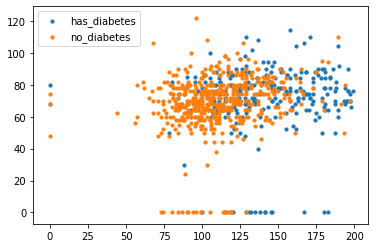

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.136208,0.023726,0.146096,-0.094326,0.023956,0.066236,0.279319,1
1,-0.180375,-0.025455,0.085490,-0.094326,-0.080366,-0.051612,-0.037348,0
2,0.312088,-0.041848,-0.207439,-0.094326,-0.129547,0.085450,-0.020681,1
3,-0.160274,-0.025455,0.024884,0.016785,-0.058012,-0.130178,-0.204015,0
4,0.080932,-0.238569,0.146096,0.104256,0.165535,0.775458,-0.004015,1
...,...,...,...,...,...,...,...,...
763,-0.099973,0.056513,0.277410,0.118440,0.013523,-0.128470,0.495985,0
764,0.005555,0.007332,0.065288,-0.094326,0.071646,-0.056309,-0.104015,0
765,0.000530,0.023726,0.024884,0.038062,-0.086328,-0.096873,-0.054015,0
766,0.025656,-0.074635,-0.207439,-0.094326,-0.028205,-0.052466,0.229319,1


In [11]:
data = pd.read_csv("diabetes_data.csv", index_col = None, header = 0)
# print(data)
plot_data()
data = scale_data(data)
data

In [12]:
# 70% of the data assigned to the train set
train_size = int(0.7*len(data))
train_set = data[:train_size]

# 30% of the data assigned to the test set
test_size = int(0.3*len(data))
test_set = data[train_size:len(data)+1]

In [13]:
X = train_set.iloc[:, :-1].values # Taking out all the features (except for output column) from the data and storing into X
X = np.concatenate((np.ones((X.shape[0], 1), dtype=float), X), axis=1)
Y = train_set.iloc[:, -1].values  # The column that contains the result/output
Y = Y.reshape((-1, 1)) # making the array n*1 shape

In [14]:
def sigmoid(z):
    g = 1.0 / (1 + np.exp(-z))
    return g

def cost(x, y, theta):
    m = x.shape[0]
    h = sigmoid(np.matmul(x, theta))
    cost = (np.matmul(-y.T, np.log(h)) - np.matmul((1 -y.T), np.log(1 - h)))/m
    return cost

def gradient_Descent(theta, alpha, x , y):
    m = x.shape[0]
    h = sigmoid(np.matmul(x, theta))
    grad = np.matmul(X.T, (h - y)) / m;
    theta = theta - alpha * grad
    return theta


def predict(test_data, Theta, Y_test):
    h = sigmoid(np.matmul(test_data, Theta))
    predicted_classes = (h > .5).astype(int)
    accuracy = np.mean(predicted_classes == Y_test)
    return accuracy * 100

In [15]:
# Initialization part
np.random.seed(0) # prevents from having different random nums each time code runs
Theta = np.random.uniform(0, 1, size = (X.shape[1], 1)) #this is our weight vectors

In [ ]:
n_iterations = 10000000
learning_rate = 0.05

for i in range(n_iterations):
    Theta = gradient_Descent(Theta, learning_rate, X, Y)
    if i % 50 == 0:
        print(cost(X, Y, Theta))

In [0]:
# # Algorithm in action
# # while j > converge_change:
# for i in range(10000):
#     hypotheses = np.dot(X, Theta) # return an array containing our hypotheses
#     hypotheses = sigmoid(hypotheses)
#     # print("before----",hypotheses.shape)
#     j = loss_function(hypotheses, Y)
#     print("------------->",j, hypotheses.shape)
#     grad= hypotheses - Y
#     grad_weight= np.dot(X.T,grad)/X.shape[0]
#     Theta=Theta-.05*sum(grad_weight)
#     # Theta = Theta - (alpha * sum(np.dot(X.T, (hypotheses - Y)))) / m
#     # Theta = Theta - (alpha * sum(np.matmul(X.T, (hypotheses - Y)))) / m
   

In [37]:
X_test = test_set.iloc[:, :-1].values
X_test = np.hstack((np.ones([X_test.shape[0],1]), X_test))
Y_test = test_set.iloc[:, -1].values  # The column that contains the result/output
Y_test = Y_test.reshape((-1, 1)) # making the array n*1 shape
print("Accuracy:", "{:.2f}%".format(predict(X_test, Theta, Y_test)))

Accuracy: 77.92%
